In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for clean output
warnings.filterwarnings('ignore')

# Global Visualization Settings
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['font.family'] = 'sans-serif'

print("✅ Libraries imported and visualization settings applied.")

✅ Libraries imported and visualization settings applied.


In [2]:
# Load the dataset
file_path = 'api_data_aadhar_enrolment_500000_1000000.csv'
df = pd.read_csv(file_path)

# Convert date to datetime object for better analysis
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Create a 'total_enrolment' column for deeper insights
df['total_enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

print(f"✅ Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

✅ Dataset loaded successfully with 500000 rows and 8 columns.


In [3]:
# Displaying the first few rows and statistical summary
print("--- Data Preview ---")
display(df.head())

print("\n--- Statistical Summary ---")
display(df.describe().T)

print("\n--- Information ---")
display(df.info())

--- Data Preview ---


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-10-26,Andhra Pradesh,Nalgonda,508004,0,1,0,1
1,2025-10-26,Andhra Pradesh,Nalgonda,508238,1,0,0,1
2,2025-10-26,Andhra Pradesh,Nalgonda,508278,1,0,0,1
3,2025-10-26,Andhra Pradesh,Nandyal,518432,0,1,0,1
4,2025-10-26,Andhra Pradesh,Nandyal,518543,1,0,0,1



--- Statistical Summary ---


,count,mean,min,25%,50%,75%,max,std
date,500000,2025-11-22 21:29:53.318400256,2025-10-26 00:00:00,2025-11-05 00:00:00,2025-11-15 00:00:00,2025-12-21 00:00:00,2025-12-31 00:00:00,NaN
pincode,500000.0,518077.362504,100000.0,365541.0,517583.0,695023.0,855456.0,204615.861812
age_0_5,500000.0,3.009628,0.0,1.0,2.0,3.0,210.0,4.658289
age_5_17,500000.0,1.082962,0.0,0.0,0.0,1.0,97.0,2.537596
age_18_greater,500000.0,0.089984,0.0,0.0,0.0,0.0,318.0,1.073745
total_enrolment,500000.0,4.182574,1.0,1.0,2.0,5.0,320.0,6.248776



--- Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             500000 non-null  datetime64[ns]
 1   state            500000 non-null  object        
 2   district         500000 non-null  object        
 3   pincode          500000 non-null  int64         
 4   age_0_5          500000 non-null  int64         
 5   age_5_17         500000 non-null  int64         
 6   age_18_greater   500000 non-null  int64         
 7   total_enrolment  500000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 30.5+ MB


None

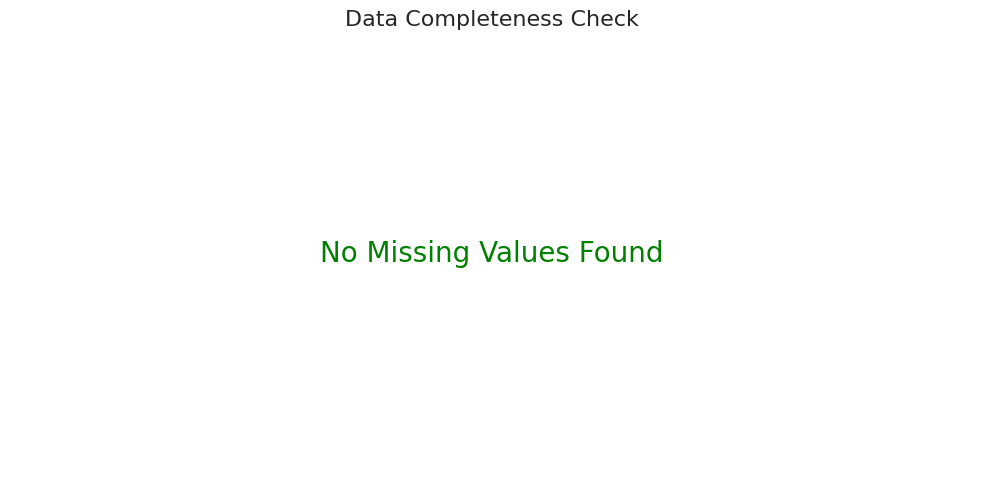

In [4]:
plt.figure(figsize=(10, 5))
missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    sns.barplot(x=missing_data.index, y=missing_data.values, palette="Reds_r")
    plt.title("Distribution of Missing Values per Feature")
    plt.ylabel("Count of Missing Values")
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Values Found', fontsize=20, ha='center', va='center', color='green')
    plt.title("Data Completeness Check")
    plt.axis('off')

plt.tight_layout()
plt.show()

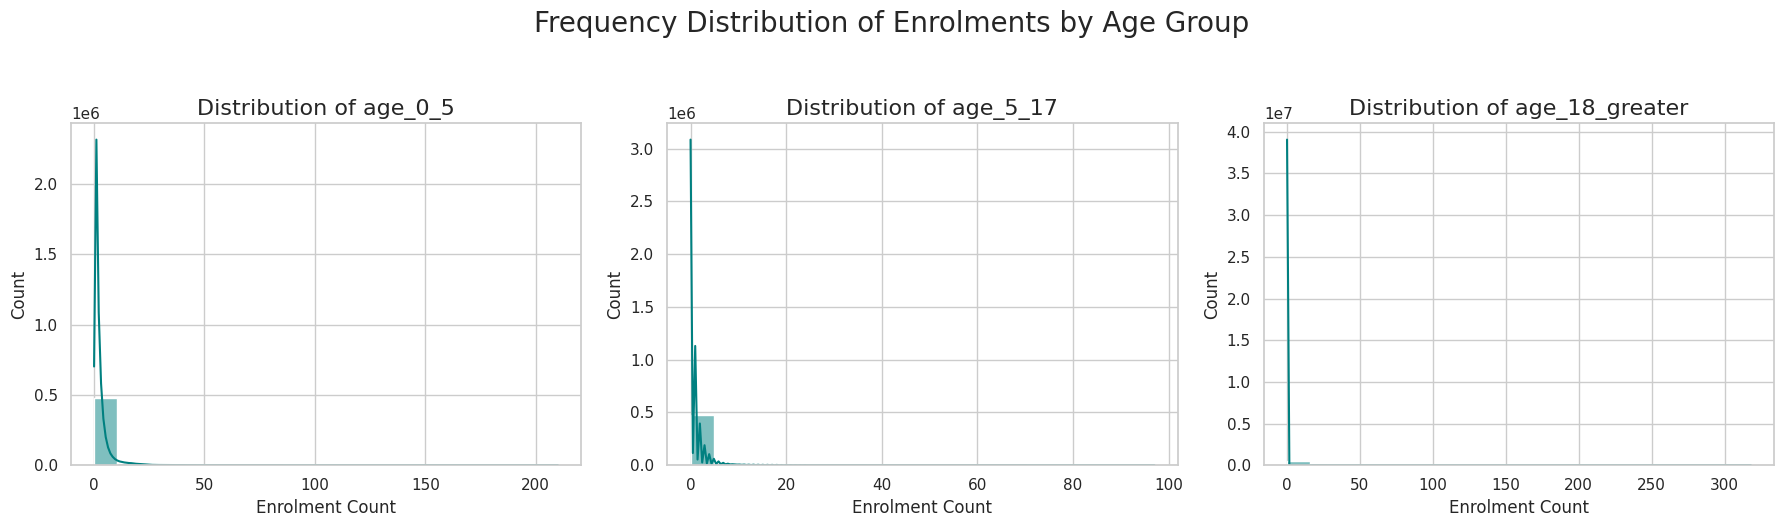

In [5]:
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal', bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Enrolment Count')

plt.suptitle("Frequency Distribution of Enrolments by Age Group", fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

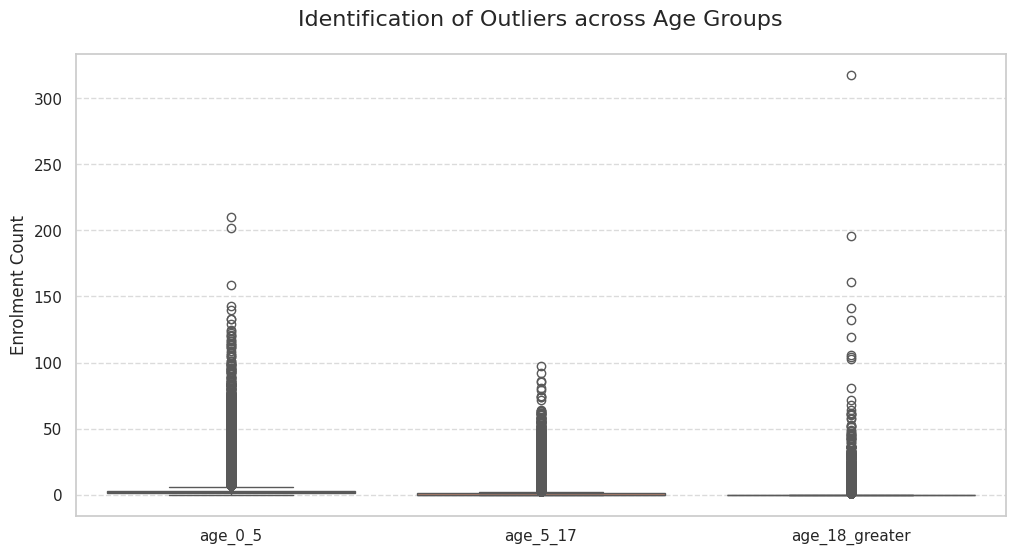

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], palette="Set2")

plt.title("Identification of Outliers across Age Groups", pad=20)
plt.ylabel("Enrolment Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

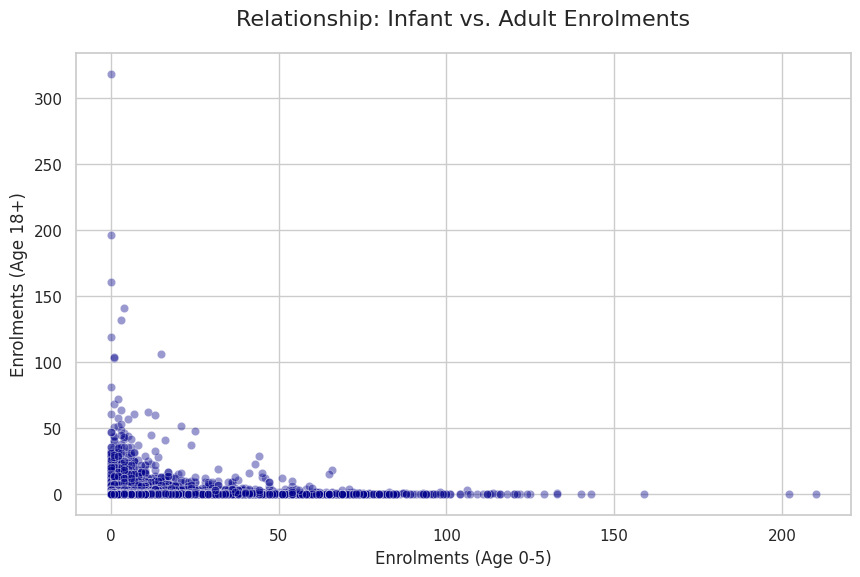

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age_0_5', y='age_18_greater', alpha=0.4, color='darkblue')

plt.title("Relationship: Infant vs. Adult Enrolments", pad=20)
plt.xlabel("Enrolments (Age 0-5)")
plt.ylabel("Enrolments (Age 18+)")
plt.show()

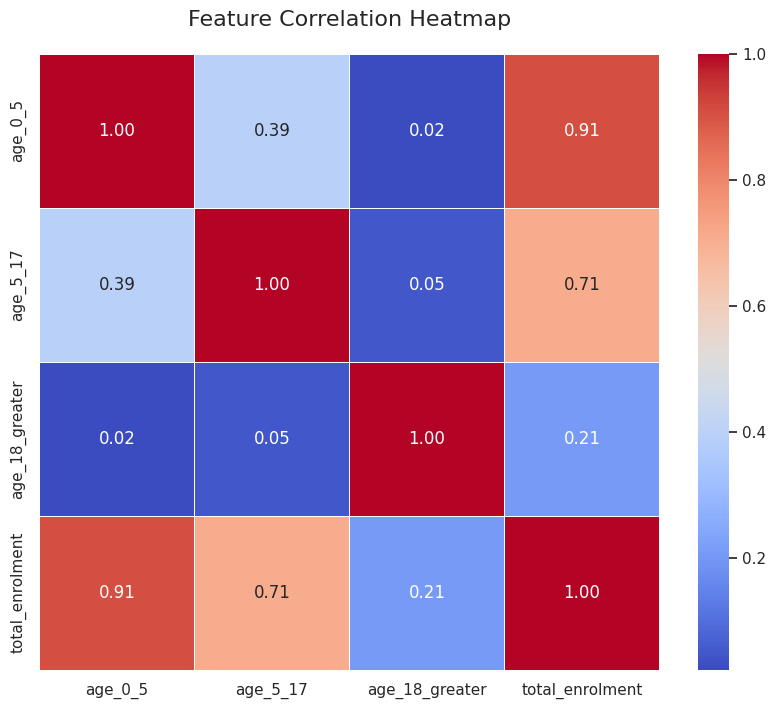

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols + ['total_enrolment']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", pad=20)
plt.show()

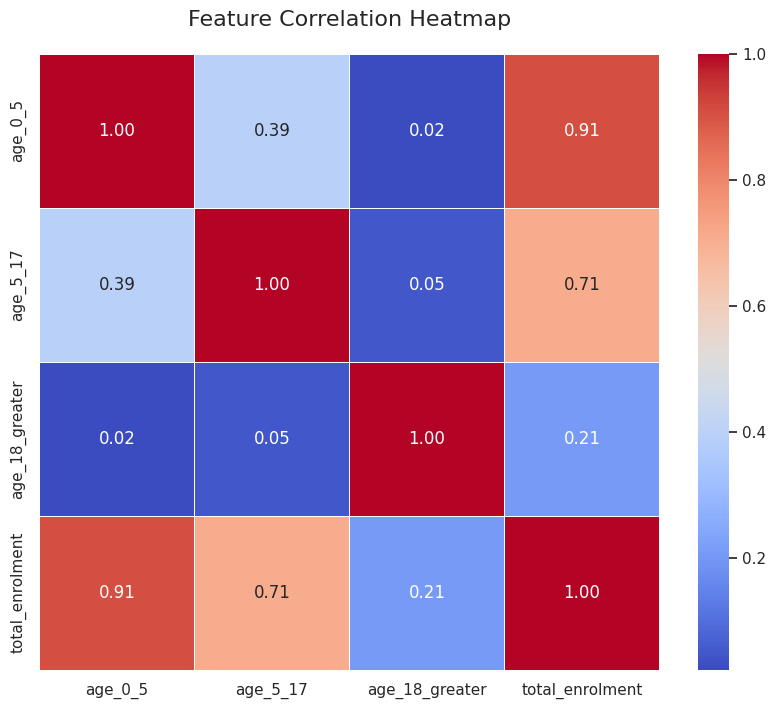

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols + ['total_enrolment']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", pad=20)
plt.show()

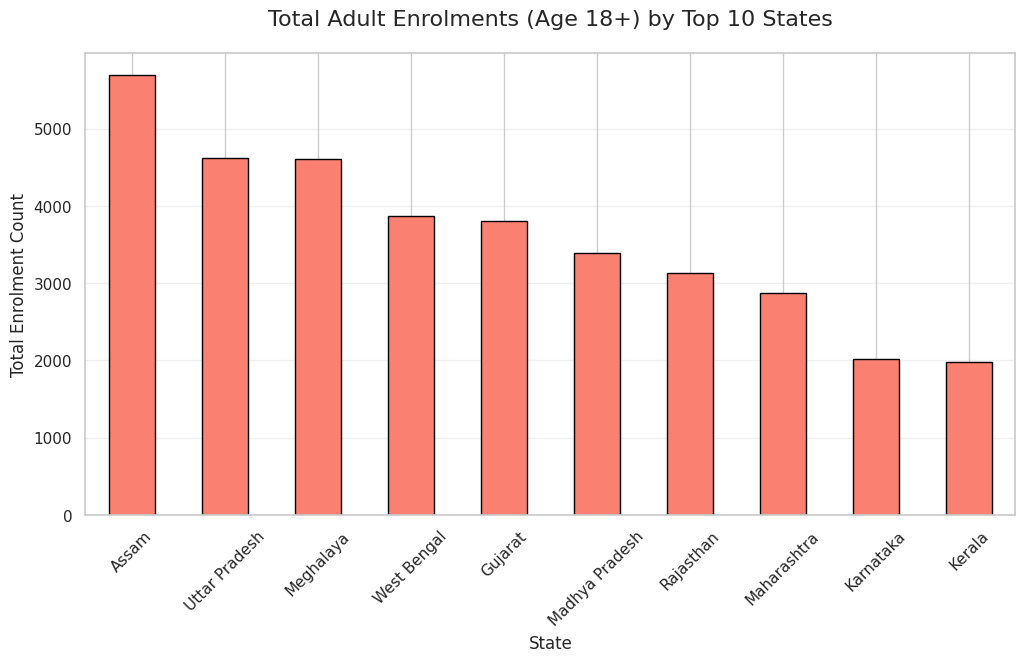

In [10]:
# Aggregating total adult enrolment by state
state_performance = df.groupby('state')['age_18_greater'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar', color='salmon', edgecolor='black')

plt.title("Total Adult Enrolments (Age 18+) by Top 10 States", pad=20)
plt.xlabel("State")
plt.ylabel("Total Enrolment Count")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

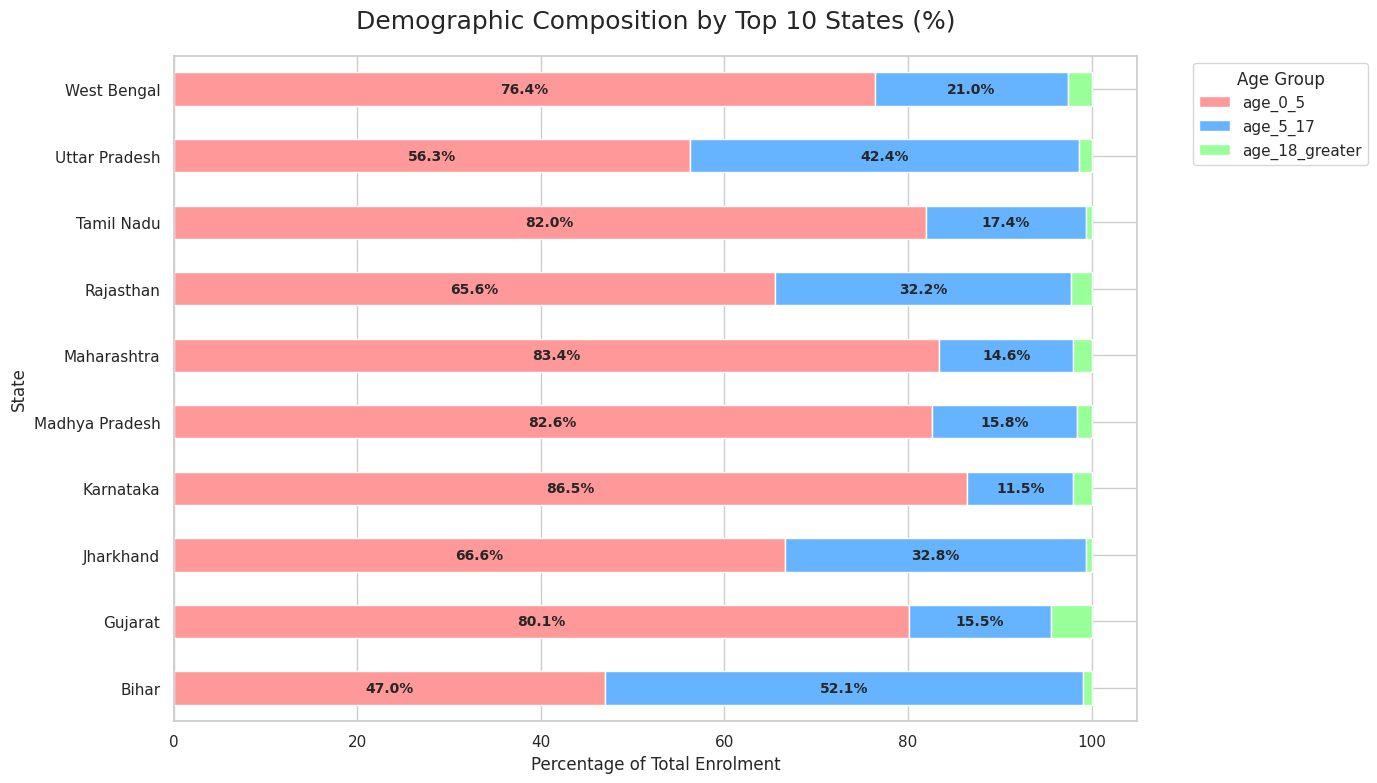

In [11]:
# Preparing data for stacked bar
top_10_states = df.groupby('state')['total_enrolment'].sum().nlargest(10).index
state_demo = df[df['state'].isin(top_10_states)].groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

# Normalize to 100% for composition analysis
state_demo_pct = state_demo.div(state_demo.sum(axis=1), axis=0) * 100

ax = state_demo_pct.plot(kind='barh', stacked=True, figsize=(14, 8), color=['#ff9999','#66b3ff','#99ff99'])

# Formatting
plt.title("Demographic Composition by Top 10 States (%)", fontsize=18, pad=20)
plt.xlabel("Percentage of Total Enrolment")
plt.ylabel("State")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage annotations
for p in ax.patches:
    width = p.get_width()
    if width > 5: # Only show labels for visible segments
        ax.text(p.get_x() + width/2, p.get_y() + p.get_height()/2,
                f'{width:.1f}%', ha='center', va='center', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

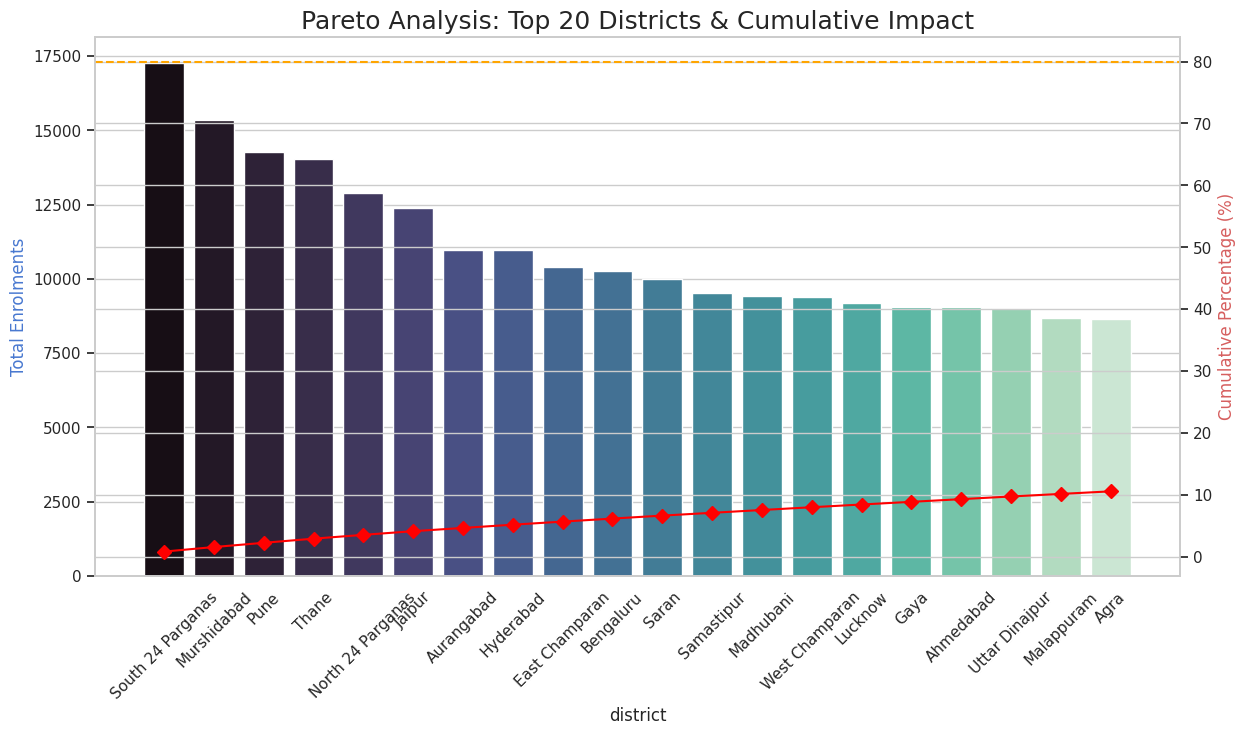

In [12]:
# Calculate cumulative percentage
dist_counts = df.groupby('district')['total_enrolment'].sum().sort_values(ascending=False)
dist_p_sum = dist_counts.cumsum() / dist_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for volumes
sns.barplot(x=dist_counts.index[:20], y=dist_counts.values[:20], ax=ax1, palette="mako")
ax1.set_ylabel("Total Enrolments", color='b', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Line chart for cumulative %
ax2 = ax1.twinx()
ax2.plot(dist_counts.index[:20], dist_p_sum[:20], color='red', marker='D', ms=7, label="Cumulative %")
ax2.axhline(80, color='orange', linestyle='--', label="80% Threshold")
ax2.set_ylabel("Cumulative Percentage (%)", color='r', fontsize=12)

plt.title("Pareto Analysis: Top 20 Districts & Cumulative Impact", fontsize=18)
plt.show()

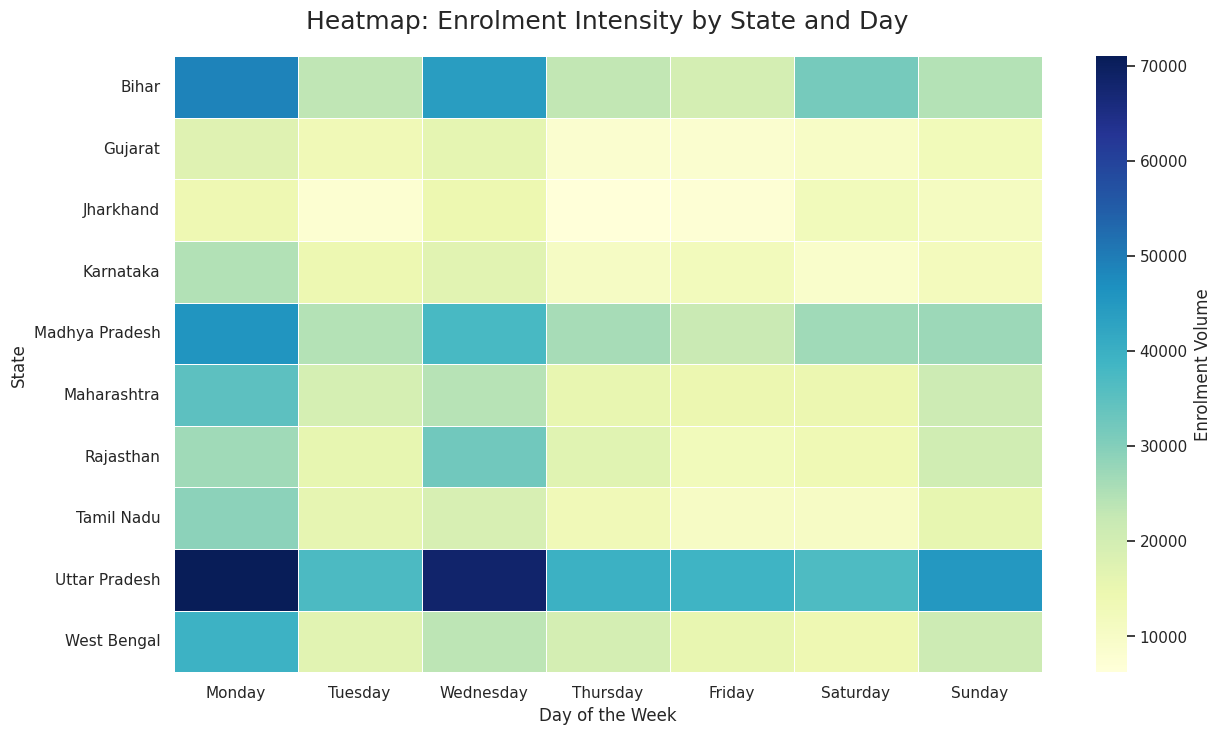

In [14]:
# Create pivot table for heatmap
df['day_name'] = df['date'].dt.day_name()
day_state_pivot = df[df['state'].isin(top_10_states)].pivot_table(
    index='state',
    columns='day_name',
    values='total_enrolment',
    aggfunc='sum'
)

# Reorder columns by day sequence
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_state_pivot = day_state_pivot[days]

plt.figure(figsize=(14, 8))
sns.heatmap(day_state_pivot, annot=False, cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Enrolment Volume'})

plt.title("Heatmap: Enrolment Intensity by State and Day", fontsize=18, pad=20)
plt.xlabel("Day of the Week")
plt.ylabel("State")
plt.show()

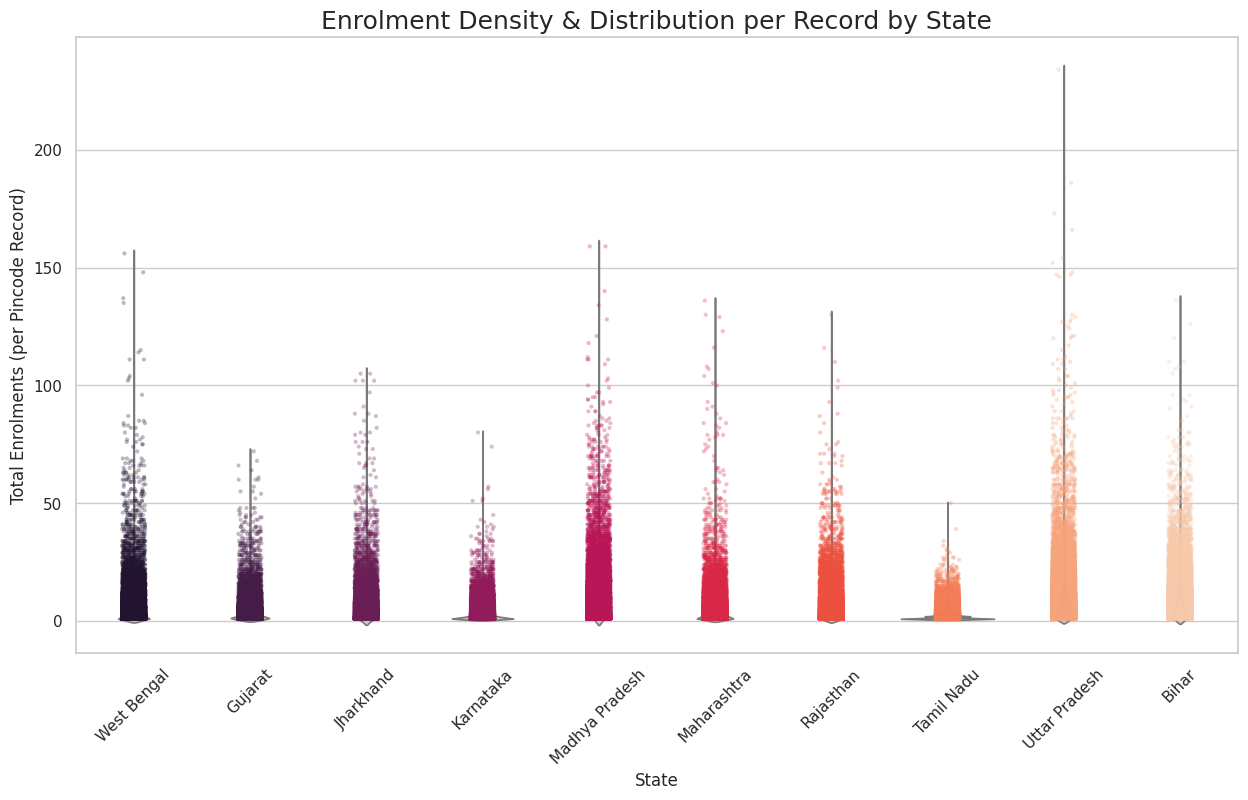

In [16]:
subset = df[df['state'].isin(top_10_states)]

plt.figure(figsize=(15, 8))
sns.violinplot(data=subset, x='state', y='total_enrolment', inner=None, color=".8")
sns.stripplot(data=subset, x='state', y='total_enrolment', palette="rocket", alpha=0.3, size=3)

plt.title("Enrolment Density & Distribution per Record by State", fontsize=18)
plt.xlabel("State")
plt.ylabel("Total Enrolments (per Pincode Record)")
plt.xticks(rotation=45)
plt.show()

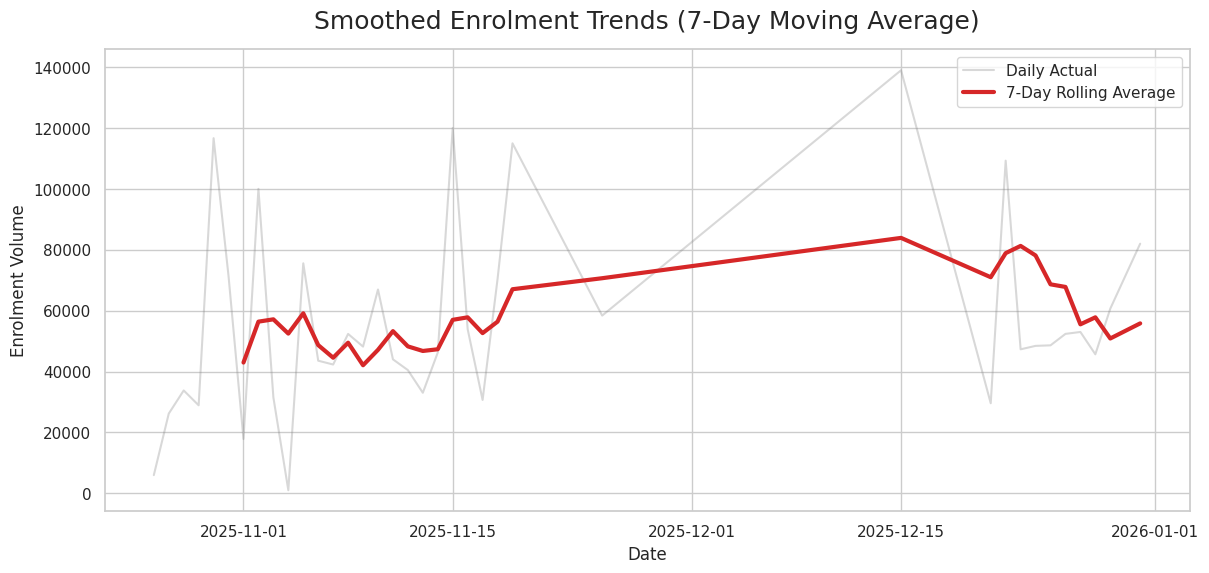

In [17]:
plt.figure(figsize=(14, 6))

# Calculate daily totals and 7-day rolling average
daily_trend = df.groupby('date')['total_enrolment'].sum().reset_index()
daily_trend['rolling_7'] = daily_trend['total_enrolment'].rolling(window=7).mean()

plt.plot(daily_trend['date'], daily_trend['total_enrolment'], alpha=0.3, color='gray', label='Daily Actual')
plt.plot(daily_trend['date'], daily_trend['rolling_7'], color='#d62728', linewidth=3, label='7-Day Rolling Average')

plt.title("Smoothed Enrolment Trends (7-Day Moving Average)", fontsize=18, pad=15)
plt.xlabel("Date")
plt.ylabel("Enrolment Volume")
plt.legend()
plt.show()

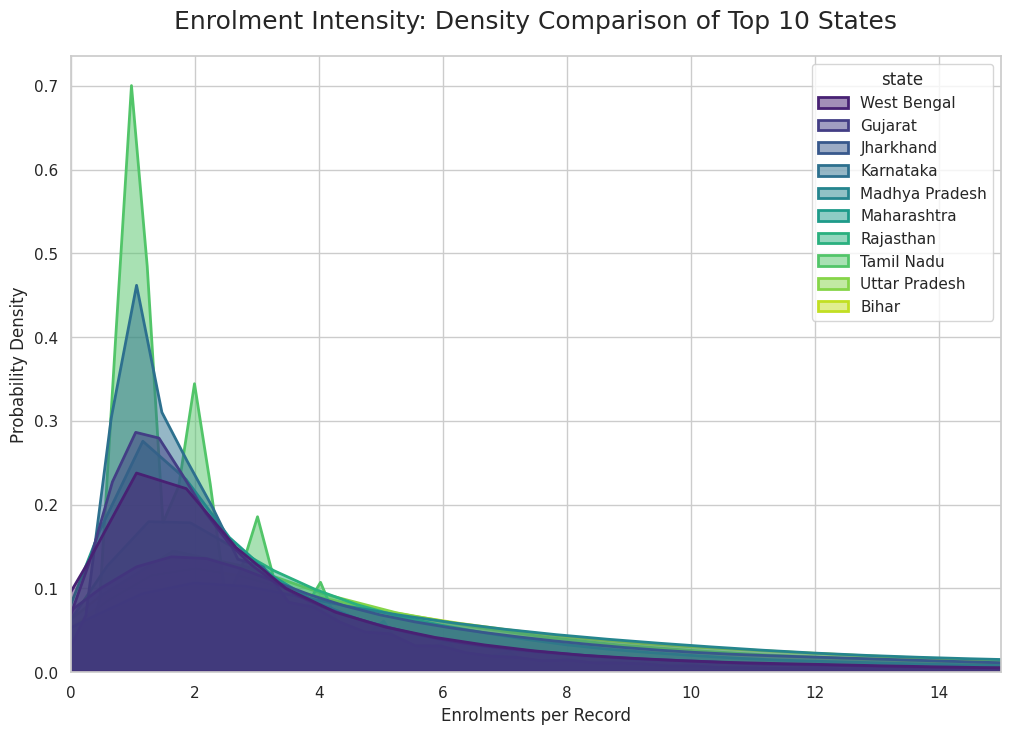

In [18]:
# Select top 10 states
top_states = df.groupby('state')['total_enrolment'].sum().nlargest(10).index
df_top = df[df['state'].isin(top_states)]

# Create the Ridge Plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_top, x='total_enrolment', hue='state', fill=True, common_norm=False, palette="viridis", alpha=0.5, linewidth=2)

plt.title("Enrolment Intensity: Density Comparison of Top 10 States", fontsize=18, pad=20)
plt.xlabel("Enrolments per Record")
plt.ylabel("Probability Density")
plt.xlim(0, 15) # Focusing on the most frequent range
plt.show()

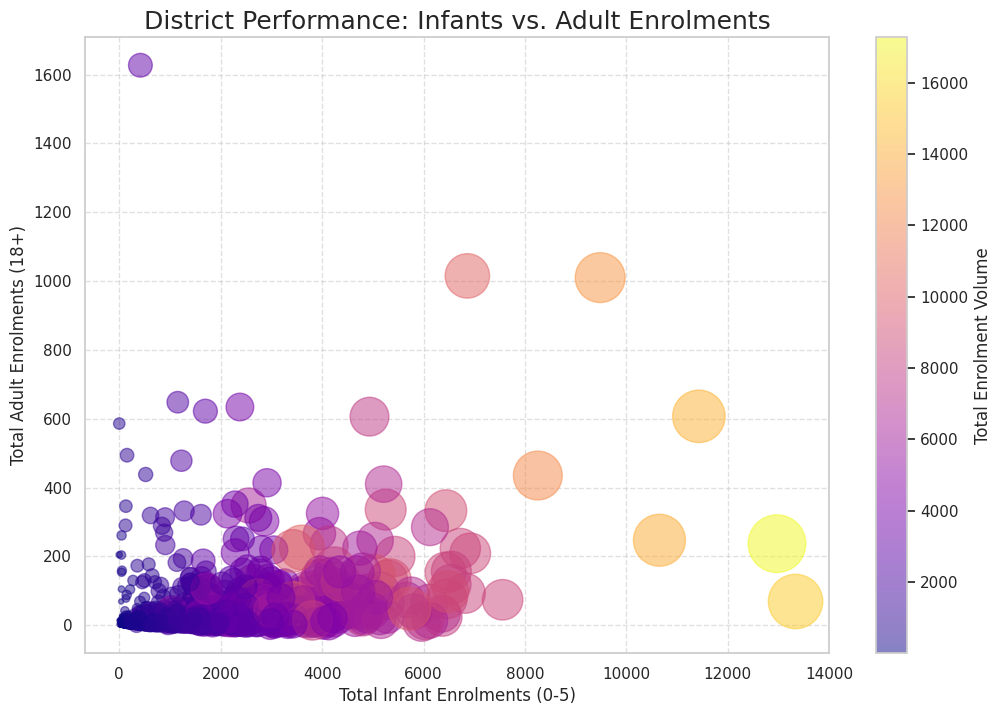

In [19]:
# Aggregate by district
dist_agg = df.groupby(['district', 'state']).agg({
    'age_0_5': 'sum',
    'age_18_greater': 'sum',
    'total_enrolment': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    x=dist_agg['age_0_5'],
    y=dist_agg['age_18_greater'],
    s=dist_agg['total_enrolment'] * 0.1, # Adjusting bubble size
    alpha=0.5,
    c=dist_agg['total_enrolment'],
    cmap='plasma'
)

plt.title("District Performance: Infants vs. Adult Enrolments", fontsize=18)
plt.xlabel("Total Infant Enrolments (0-5)")
plt.ylabel("Total Adult Enrolments (18+)")
plt.colorbar(bubble, label='Total Enrolment Volume')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

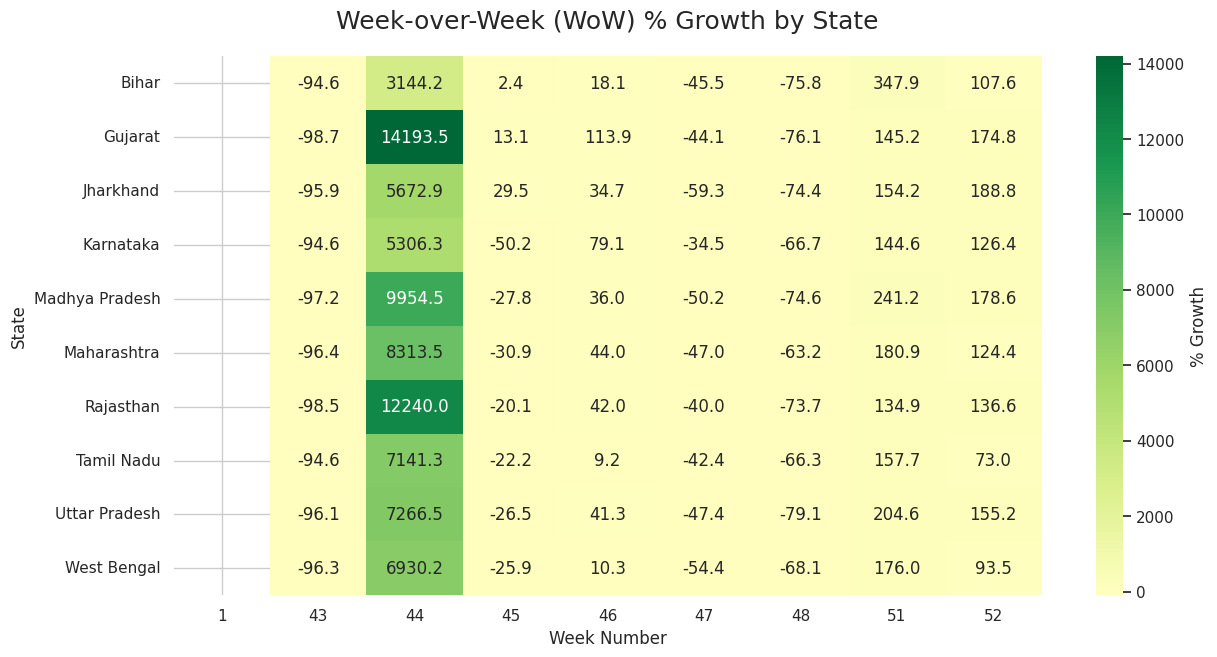

In [20]:
# Resample data to weekly
df['week'] = df['date'].dt.isocalendar().week
weekly_state = df[df['state'].isin(top_states)].pivot_table(index='week', columns='state', values='total_enrolment', aggfunc='sum')

# Calculate Percent Change
wow_growth = weekly_state.pct_change() * 100

plt.figure(figsize=(14, 7))
sns.heatmap(wow_growth.T, annot=True, fmt=".1f", cmap="RdYlGn", center=0, cbar_kws={'label': '% Growth'})

plt.title("Week-over-Week (WoW) % Growth by State", fontsize=18, pad=20)
plt.xlabel("Week Number")
plt.ylabel("State")
plt.show()

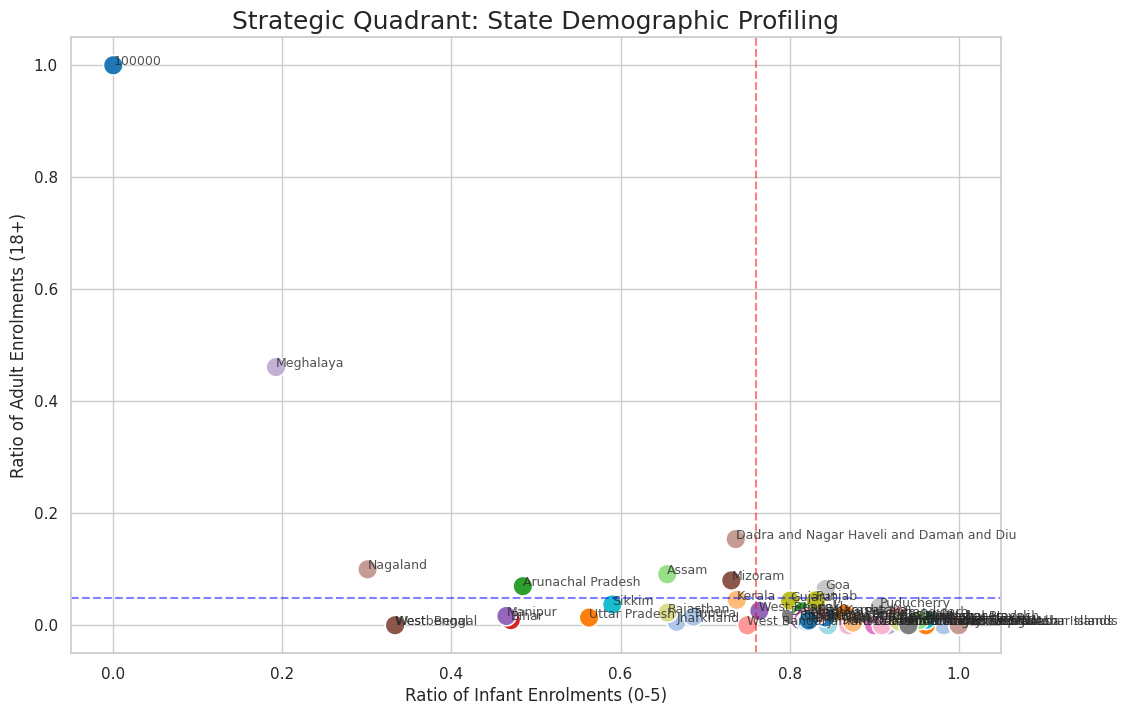

In [21]:
# Prepare demographic ratios
state_profile = df.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
state_profile_norm = state_profile.div(state_profile.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=state_profile_norm,
    x='age_0_5',
    y='age_18_greater',
    hue=state_profile_norm.index,
    s=200,
    palette="tab20",
    legend=False
)

# Label the points
for i, state in enumerate(state_profile_norm.index):
    plt.text(state_profile_norm.age_0_5[i], state_profile_norm.age_18_greater[i], state, fontsize=9, alpha=0.8)

plt.axvline(state_profile_norm['age_0_5'].mean(), color='red', linestyle='--', alpha=0.5)
plt.axhline(state_profile_norm['age_18_greater'].mean(), color='blue', linestyle='--', alpha=0.5)

plt.title("Strategic Quadrant: State Demographic Profiling", fontsize=18)
plt.xlabel("Ratio of Infant Enrolments (0-5)")
plt.ylabel("Ratio of Adult Enrolments (18+)")
plt.show()

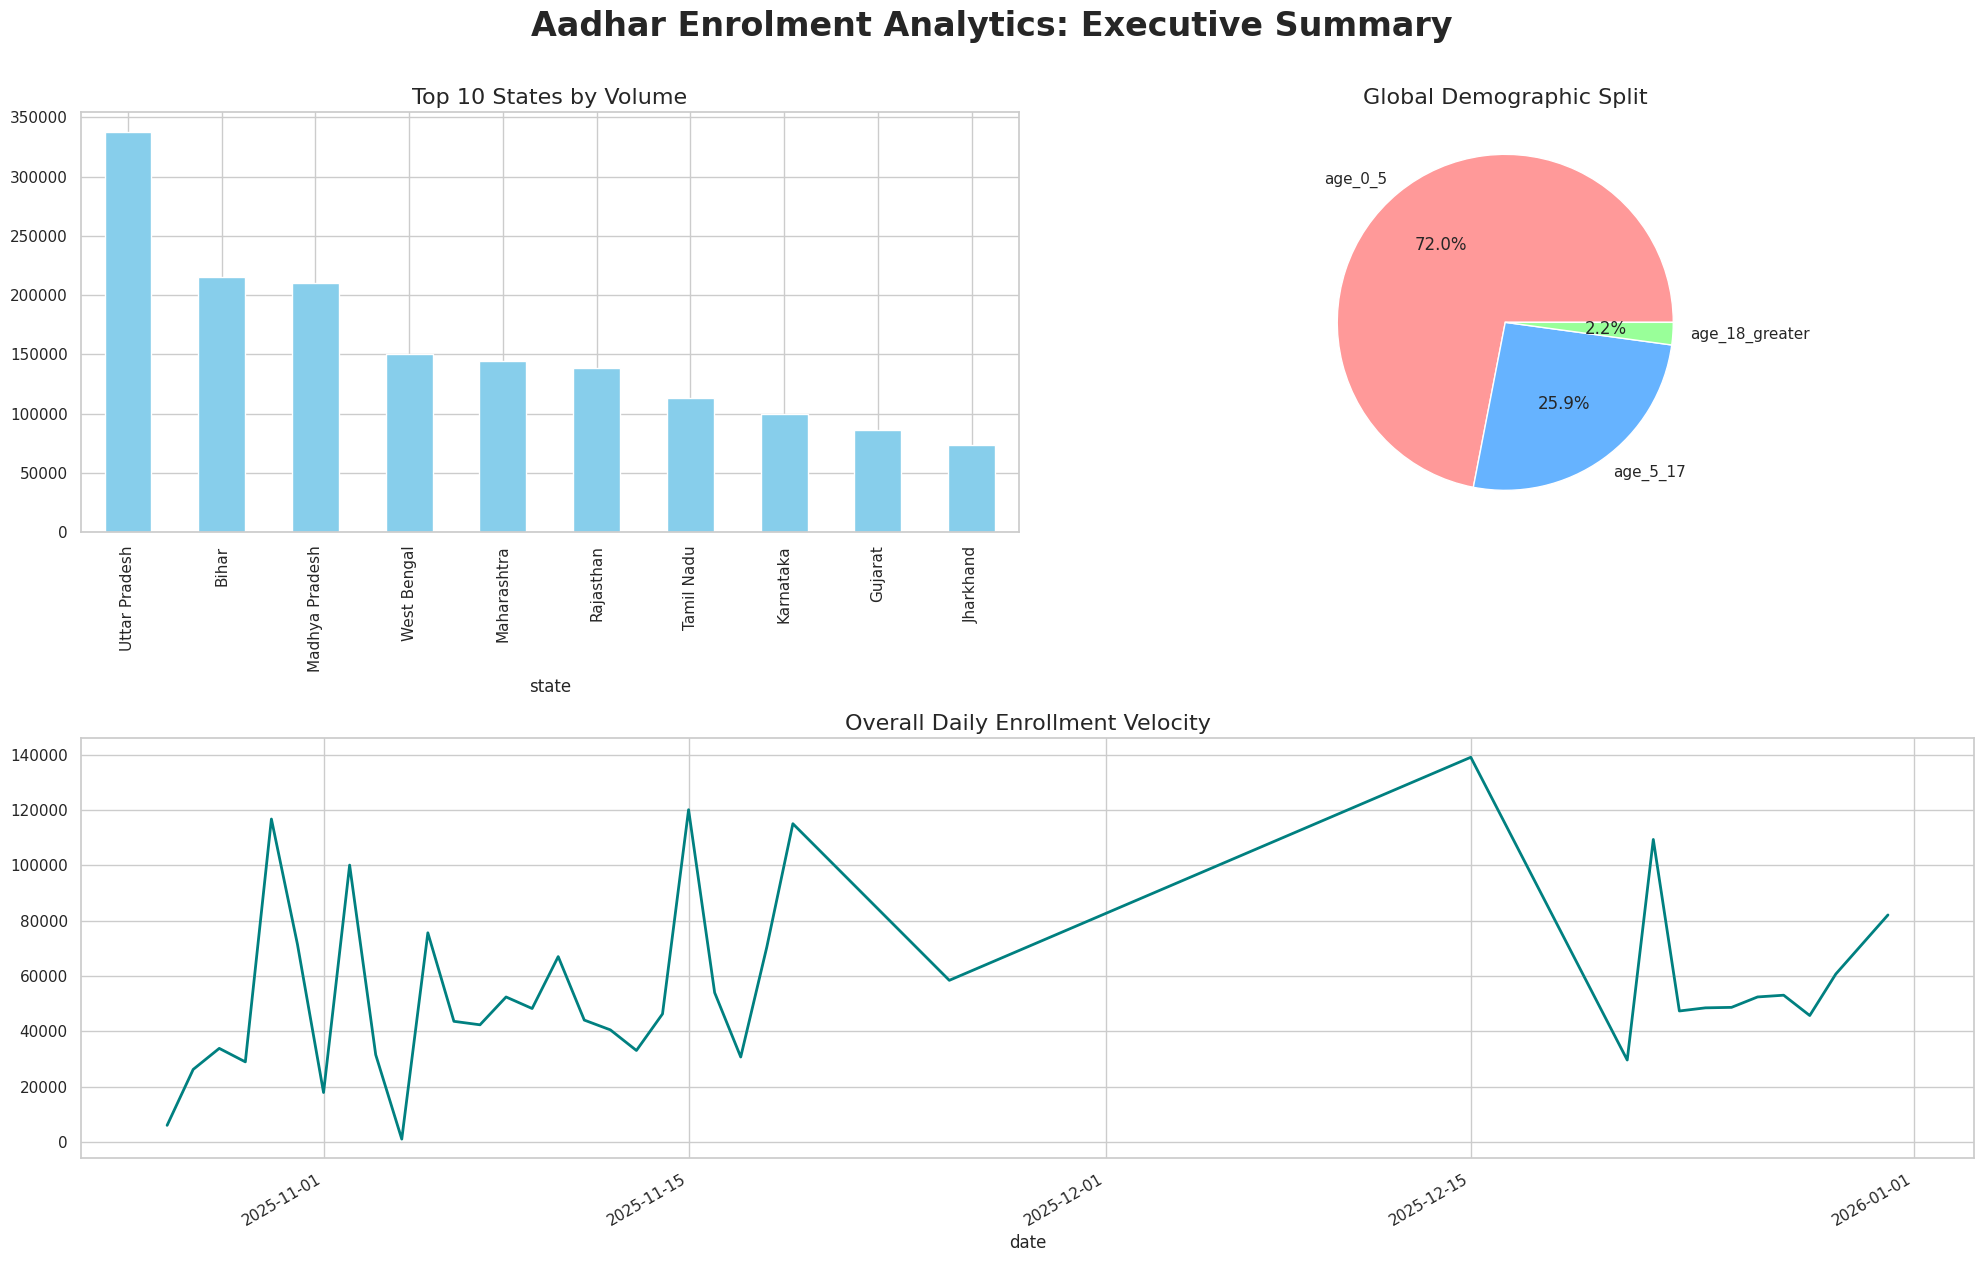

In [22]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2)

# 1. Total Volume by State
ax1 = fig.add_subplot(gs[0, 0])
df.groupby('state')['total_enrolment'].sum().nlargest(10).plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title("Top 10 States by Volume")

# 2. Demographic Breakdown
ax2 = fig.add_subplot(gs[0, 1])
df[['age_0_5', 'age_5_17', 'age_18_greater']].sum().plot(kind='pie', autopct='%1.1f%%', ax=ax2, colors=['#ff9999','#66b3ff','#99ff99'])
ax2.set_title("Global Demographic Split")

# 3. Weekly Trend
ax3 = fig.add_subplot(gs[1, :])
df.groupby('date')['total_enrolment'].sum().plot(ax=ax3, color='teal', linewidth=2)
ax3.set_title("Overall Daily Enrollment Velocity")

plt.tight_layout()
plt.suptitle("Aadhar Enrolment Analytics: Executive Summary", fontsize=24, y=1.05, fontweight='bold')
plt.show()